# Heart Disease Prediction Using Machine Learning
### Name : Ujjwal Rajput
### Class Rollno. : 76
### Section : A
### DataSet : https://www.kaggle.com/code/desalegngeb/heart-disease-predictions/input


In [3]:
import sklearn
import numpy as np
import pandas as pd
import plotly as plot
import plotly.express as px
import plotly.graph_objs as go

import cufflinks as cf
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import accuracy_score,mean_squared_error
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot


In [4]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [5]:
heart=pd.read_csv('heart.csv')

In [6]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [7]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(heart.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [8]:
heart['target']

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [9]:
heart.groupby('target').size()

target
0    138
1    165
dtype: int64

In [10]:
heart.groupby('target').sum()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,7811,114,66,18547,34650,22,62,19196,76,218.8,161,161,351
1,8662,93,227,21335,39968,23,98,26147,23,96.2,263,60,350


In [11]:
heart.shape

(303, 14)

In [12]:
heart.size

4242

In [13]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [14]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [15]:
heart['target'].unique()

array([1, 0], dtype=int64)

In [16]:
#histogram visualization

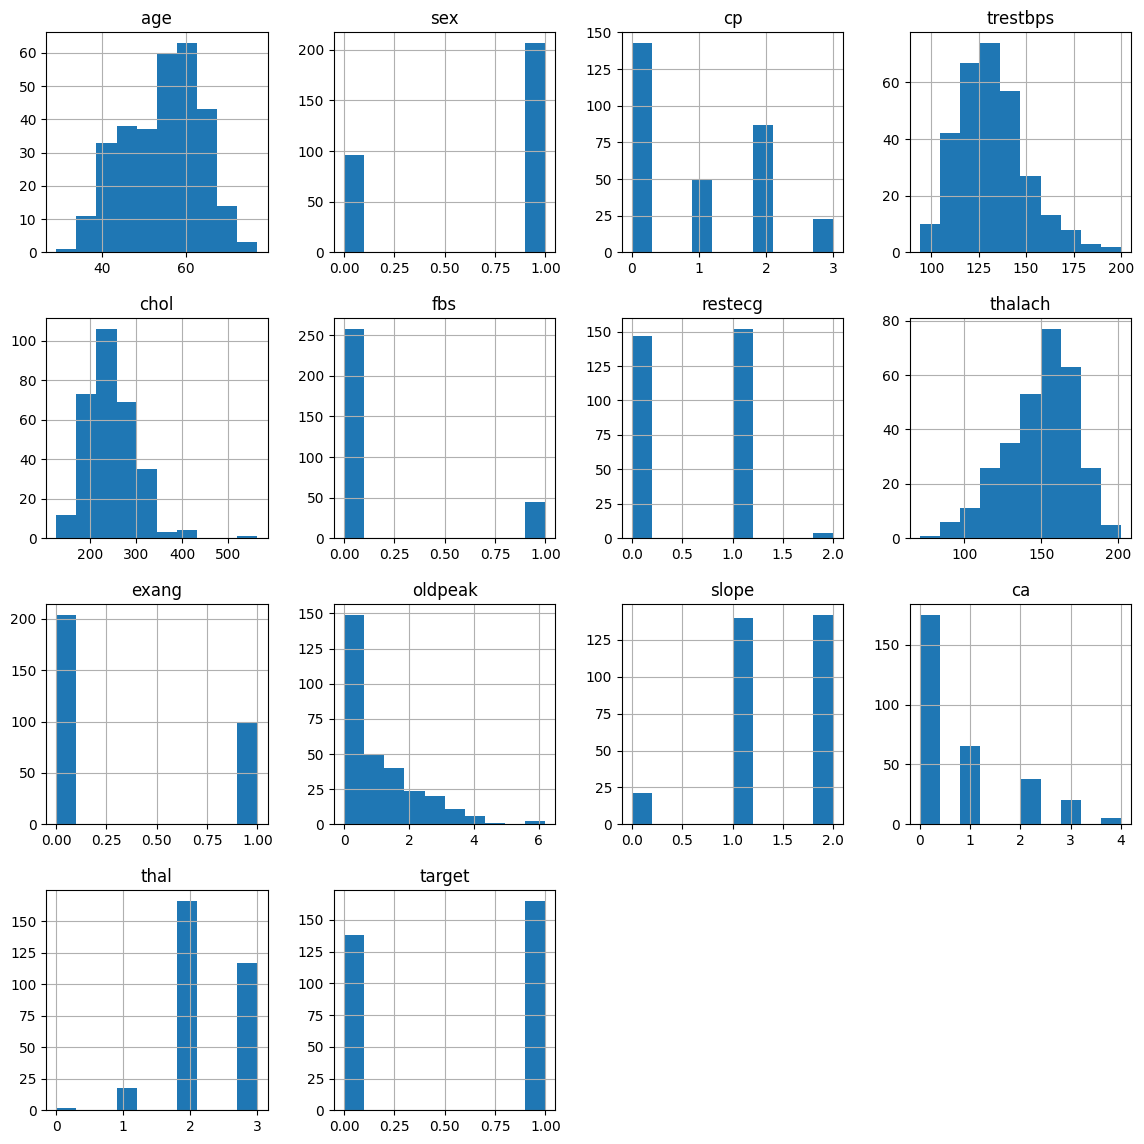

In [17]:
heart.hist(figsize=(14,14))
plt.show()

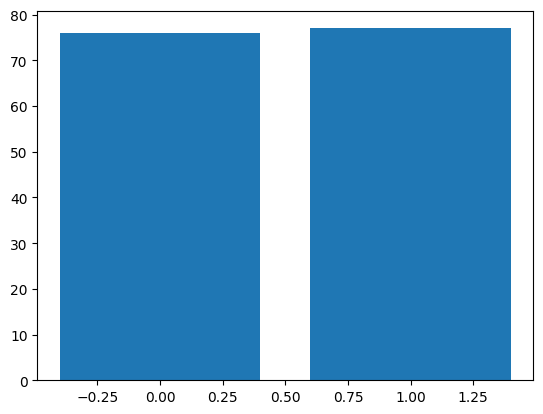

In [18]:
plt.bar(x=heart['sex'],height=heart['age'])
plt.show()

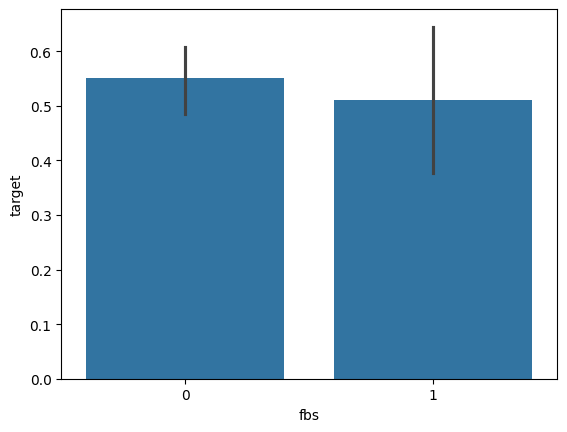

In [19]:
sns.barplot(x="fbs", y="target", data=heart)
plt.show()


<Axes: xlabel='sex', ylabel='age'>

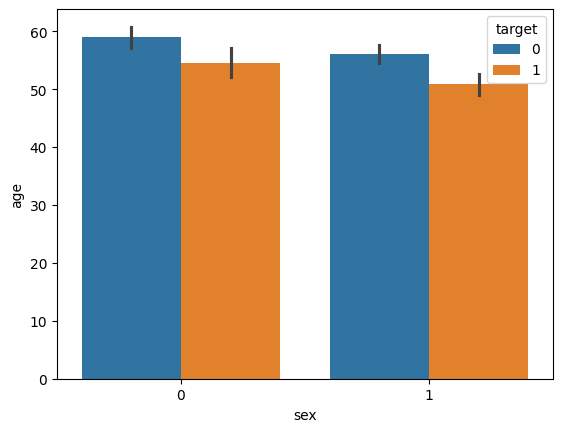

In [20]:
sns.barplot(x=heart['sex'],y=heart['age'],hue=heart['target'])

<Axes: xlabel='cp', ylabel='target'>

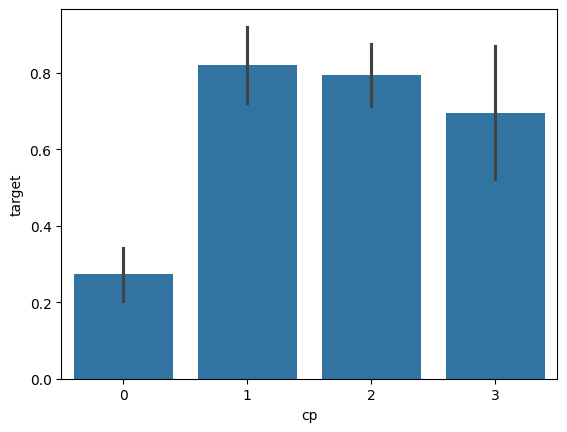

In [21]:
sns.barplot(x=heart["cp"], y=heart['target'])

<Axes: xlabel='sex', ylabel='target'>

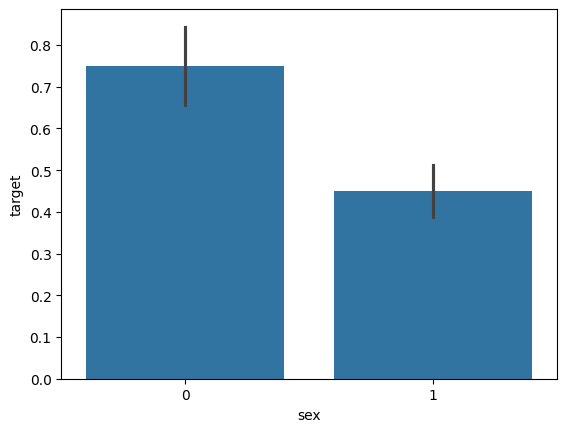

In [22]:
sns.barplot(x=heart["sex"],y=heart['target'])

<Axes: xlabel='thal', ylabel='Count'>

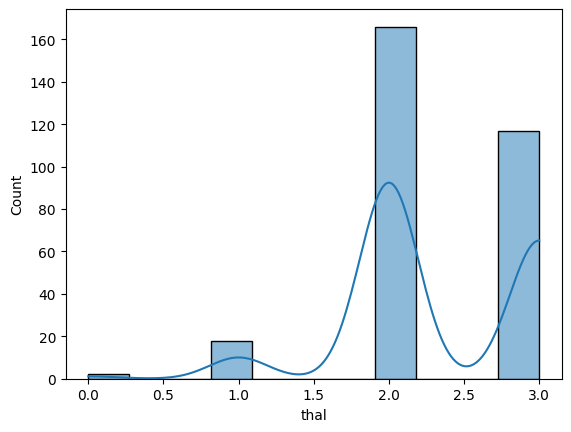

In [23]:
sns.histplot(heart["thal"],kde=True)

<Axes: xlabel='chol', ylabel='Count'>

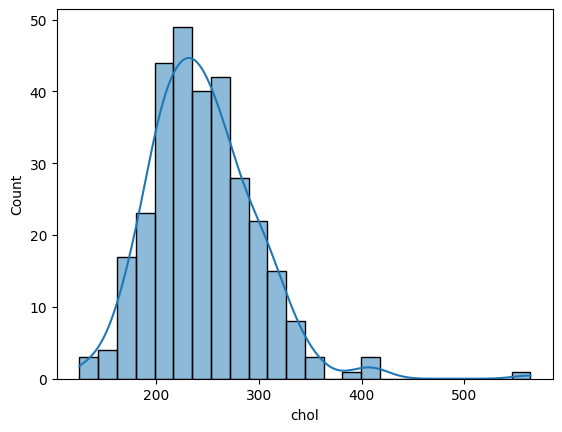

In [24]:
sns.histplot(heart["chol"], kde=True)

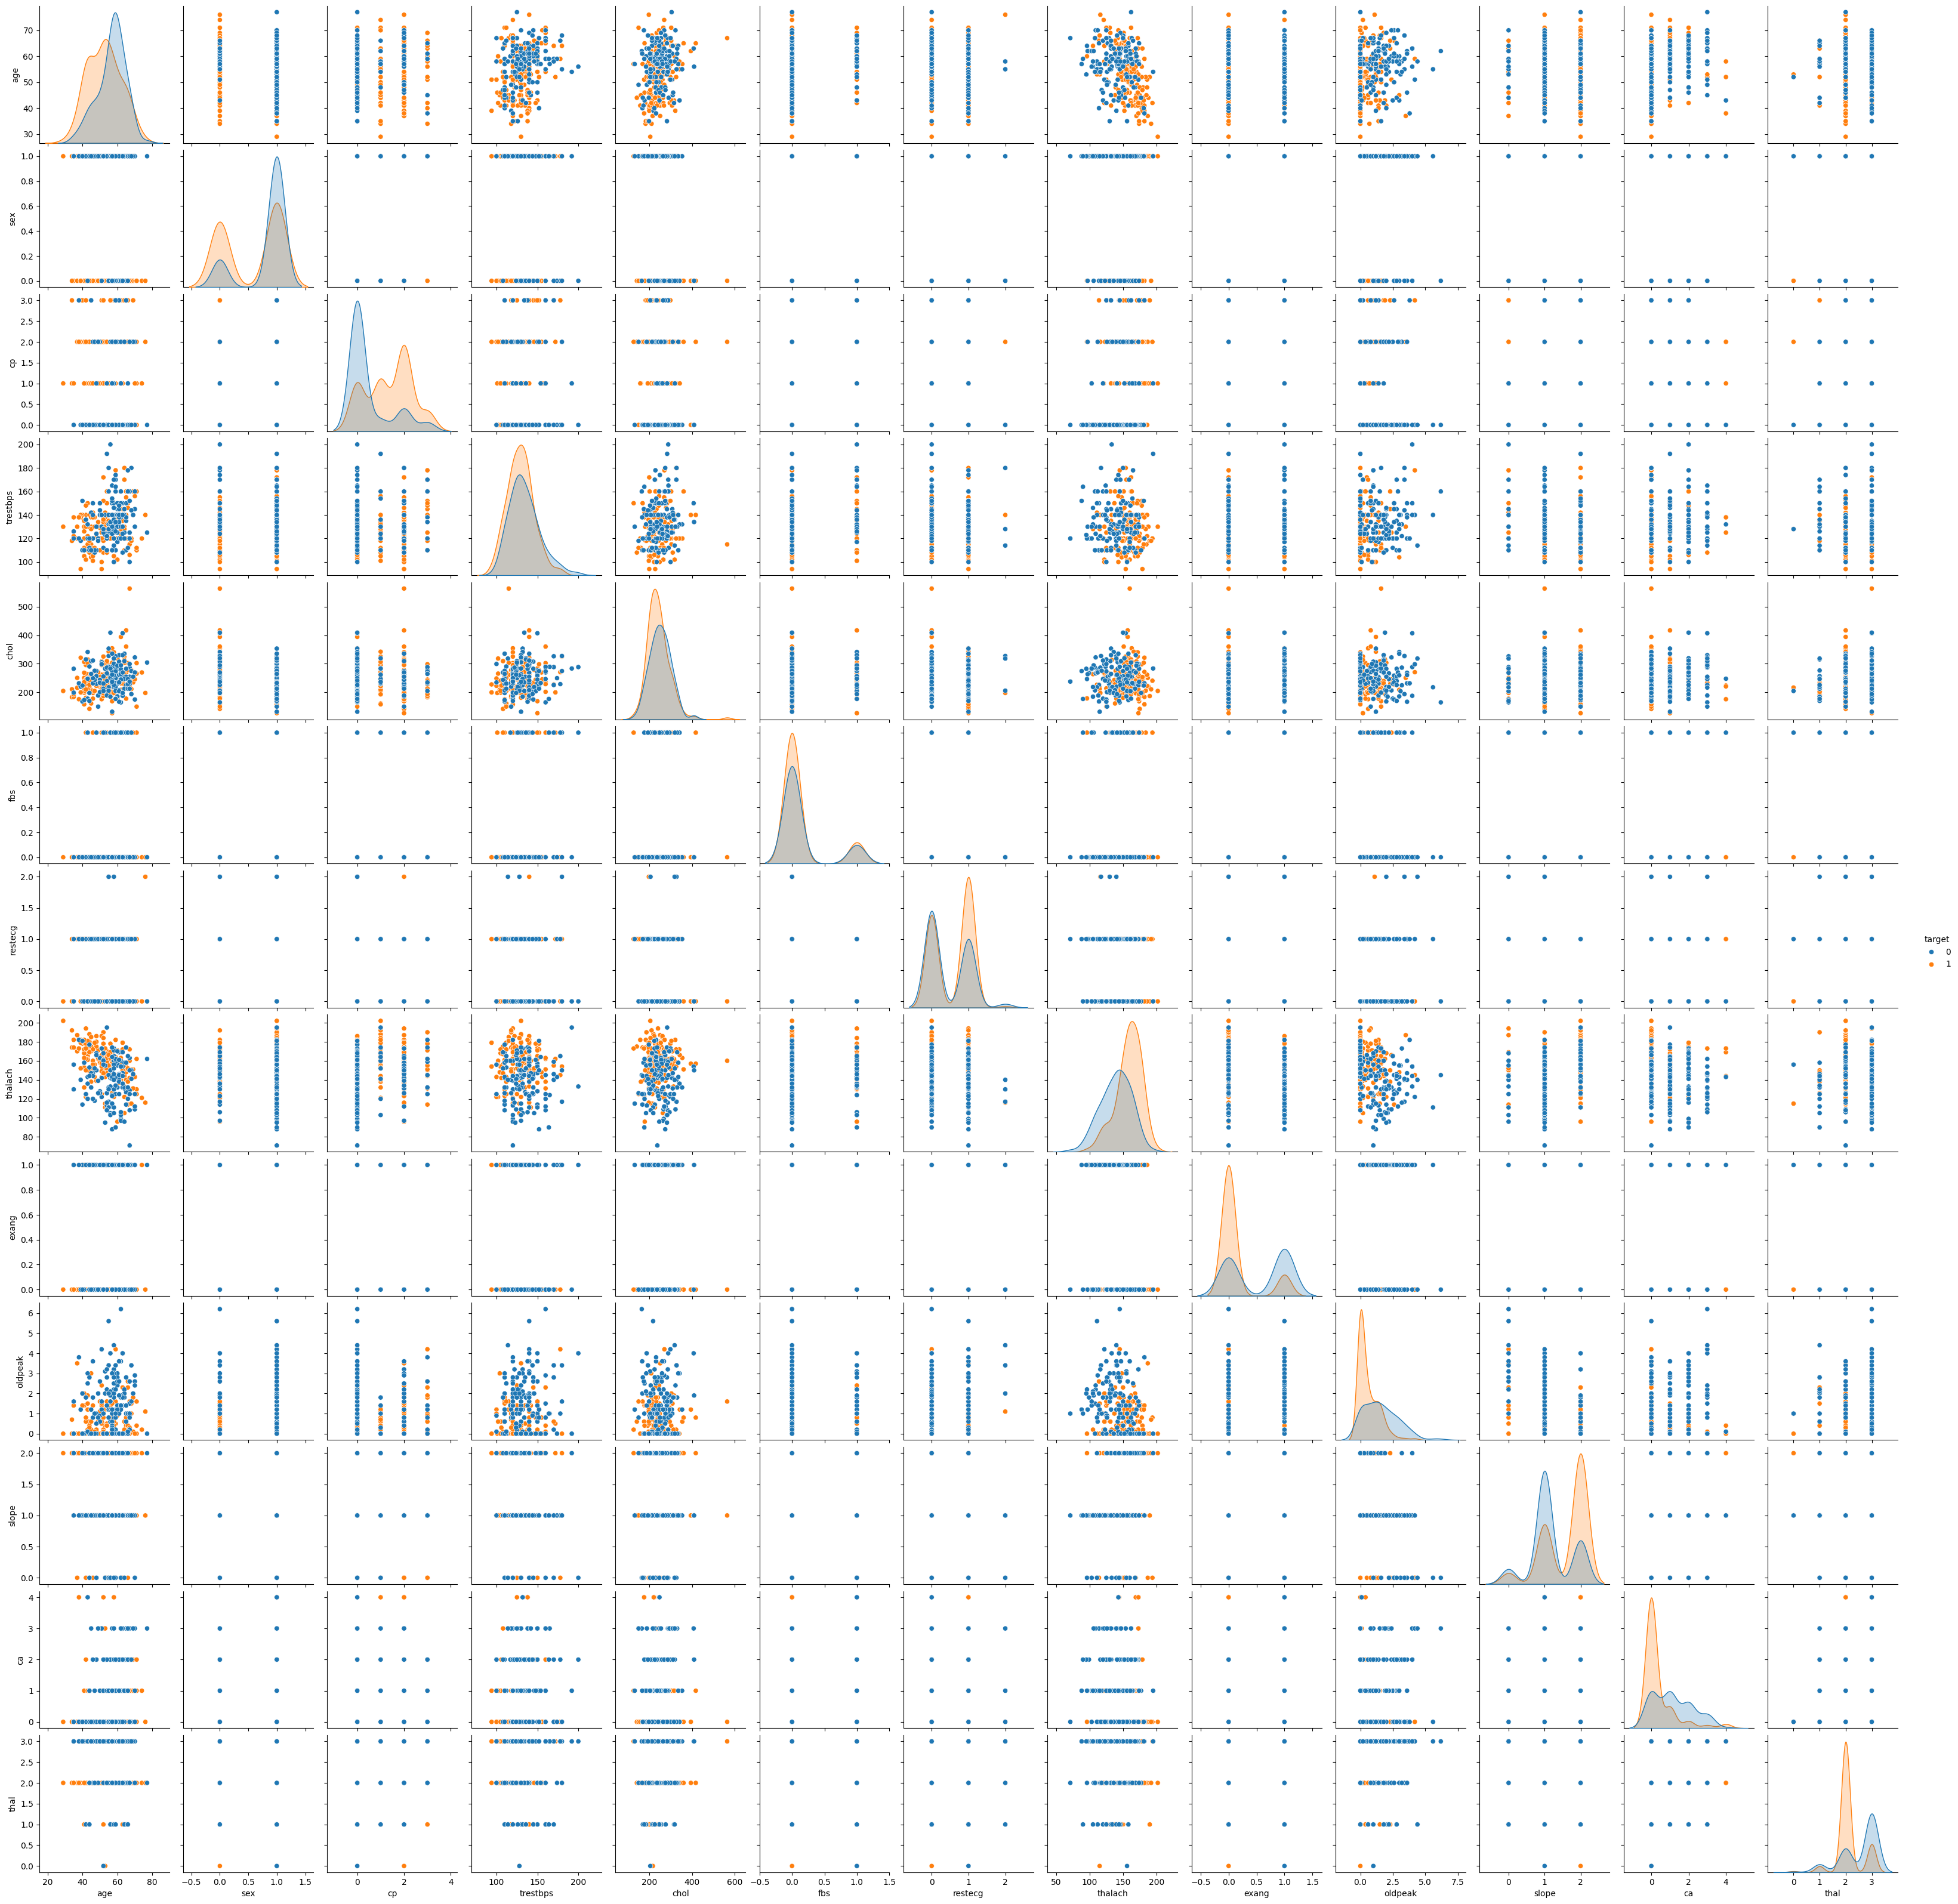

In [25]:
sns.pairplot(heart,hue='target')

In [26]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [27]:
numeric_columns=['trestbps','chol','thalach','age','oldpeak']

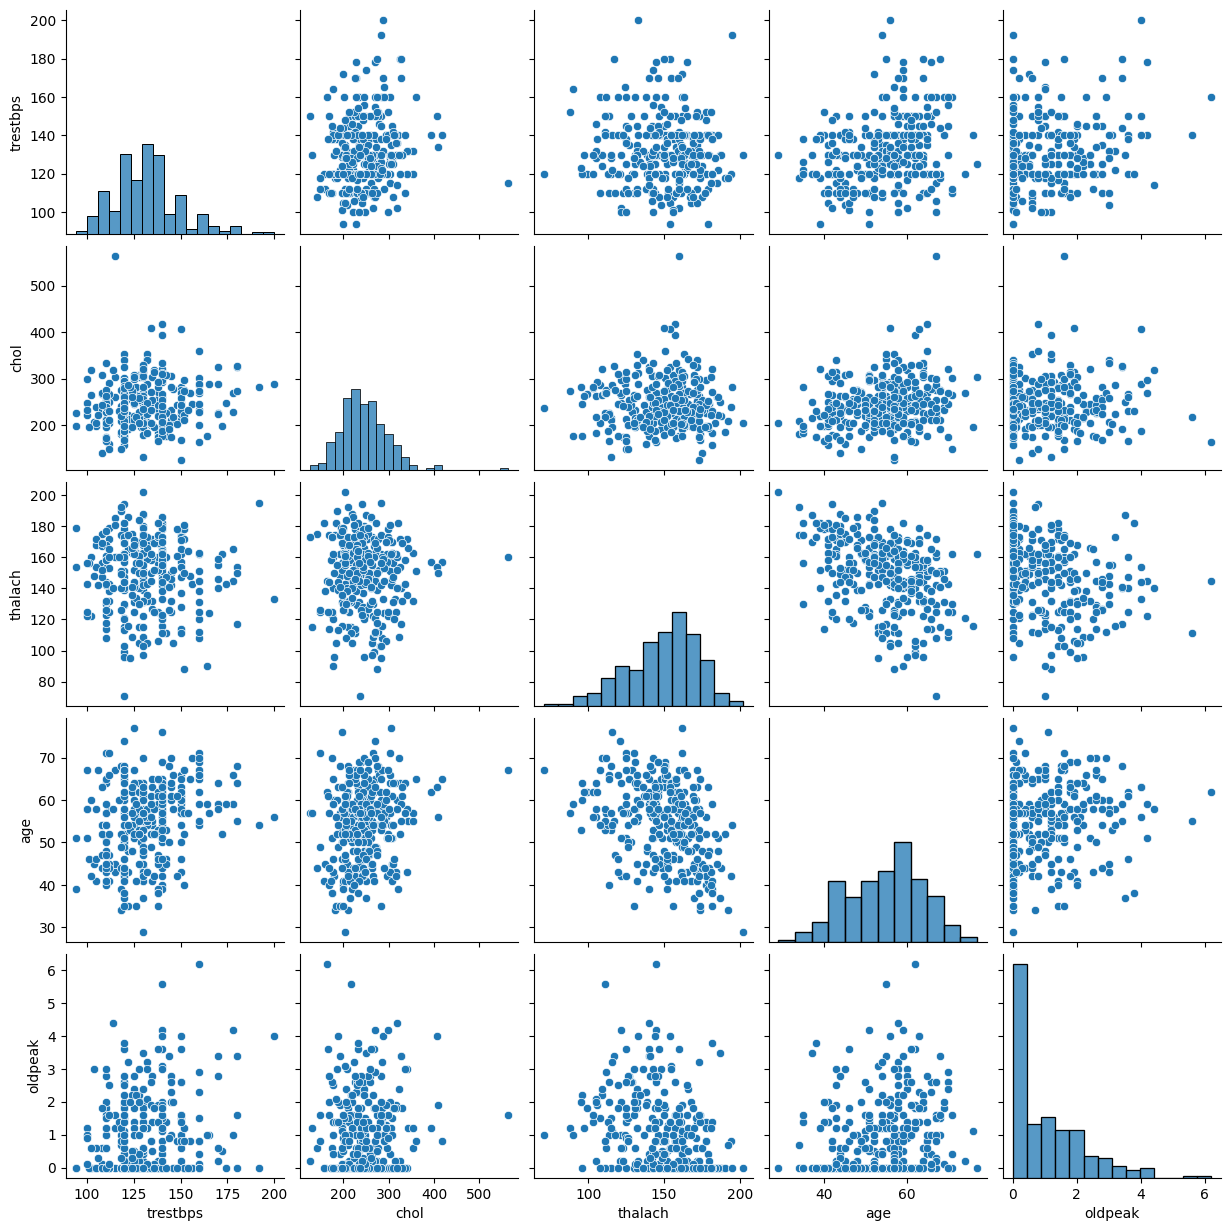

In [28]:
sns.pairplot(heart[numeric_columns])

In [29]:
heart['target']

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

target
1    165
0    138
Name: count, dtype: int64


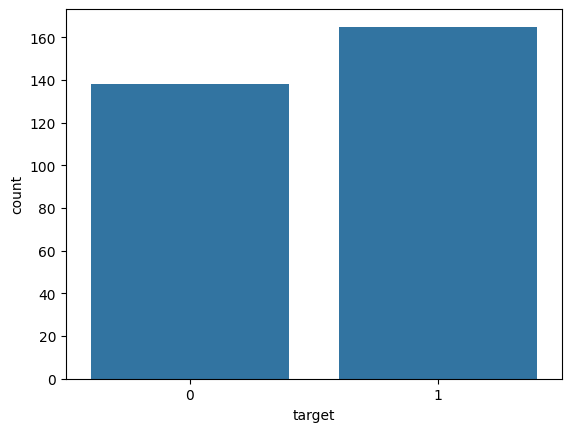

In [30]:
y = heart["target"]

sns.countplot(x=y)

target_temp = heart['target'].value_counts()

print(target_temp)

In [31]:
#Correlation Heatmap

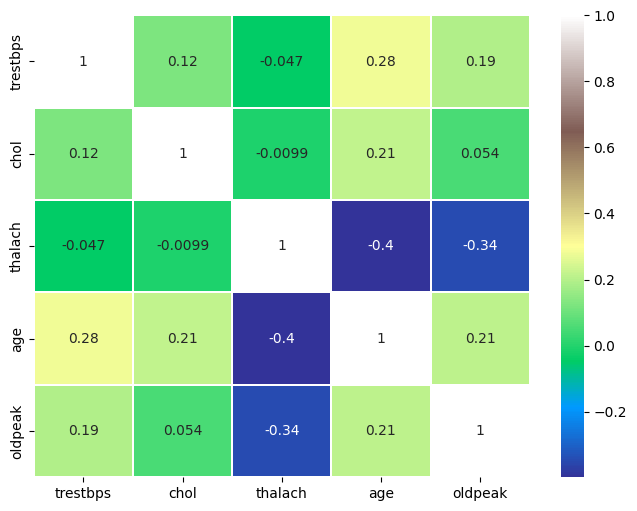

In [32]:

sns.heatmap(heart[numeric_columns].corr(),annot=True, cmap='terrain', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

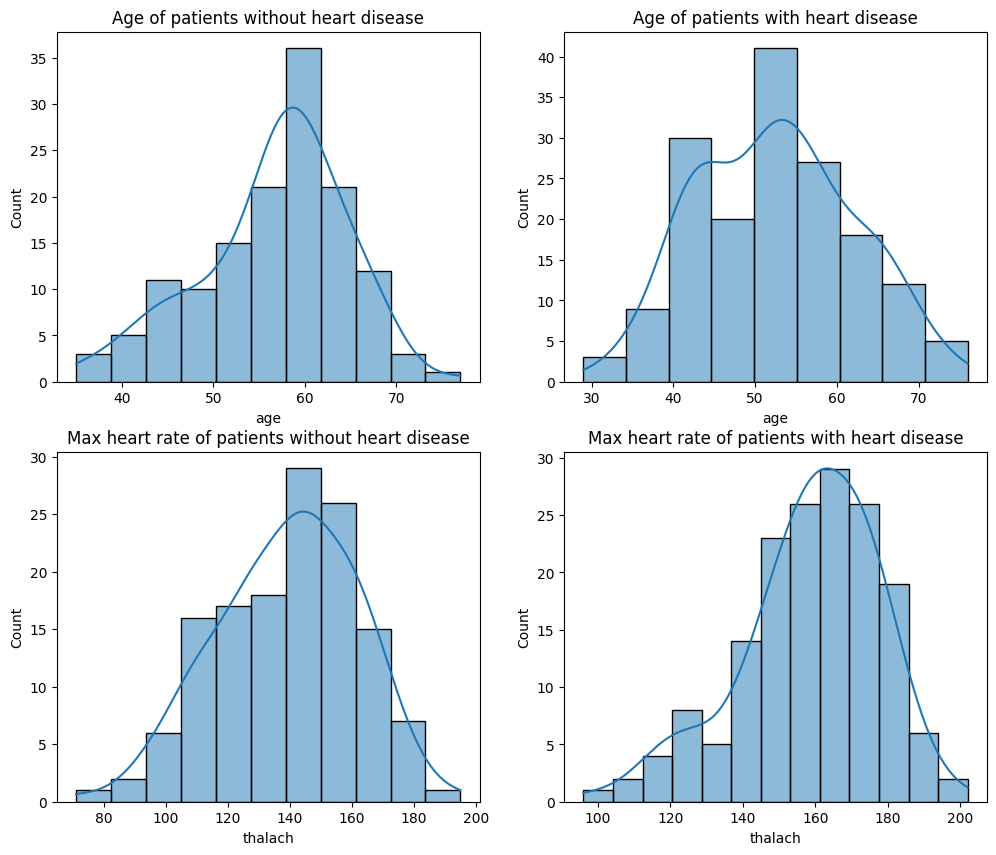

In [33]:
# create four histplots
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.histplot(heart[heart['target'] == 0]['age'], kde=True)
plt.title('Age of patients without heart disease')
plt.subplot(222)
sns.histplot(heart[heart['target'] == 1]['age'], kde=True)
plt.title('Age of patients with heart disease')
plt.subplot(223)
sns.histplot(heart[heart['target'] == 0]['thalach'], kde=True)
plt.title('Max heart rate of patients without heart disease')
plt.subplot(224)
sns.histplot(heart[heart['target'] == 1]['thalach'], kde=True)
plt.title('Max heart rate of patients with heart disease')
plt.show()

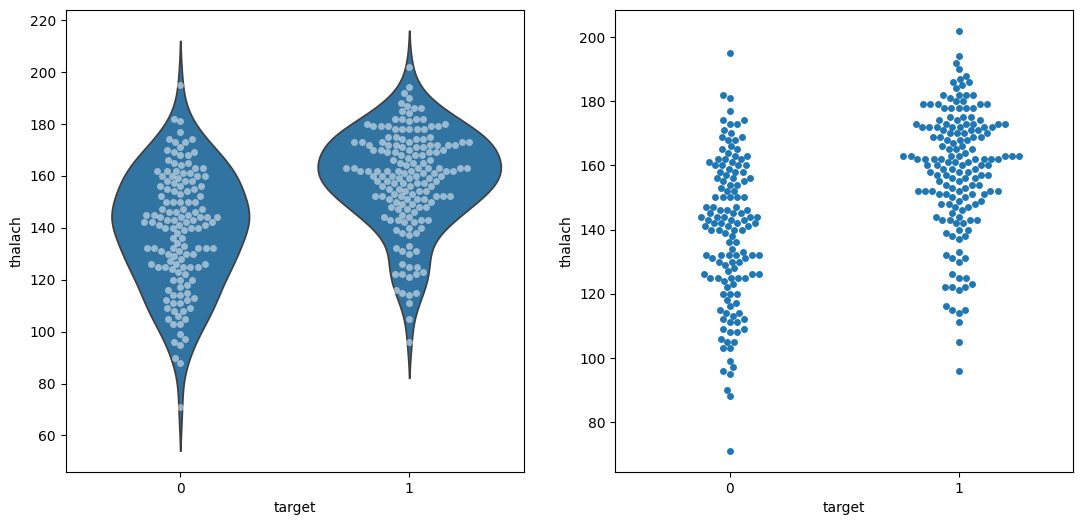

In [34]:
plt.figure(figsize=(13,6))
plt.subplot(121)
sns.violinplot(x="target", y="thalach", data=heart, inner=None)
sns.swarmplot(x="target", y="thalach", data=heart, color='w', alpha=0.5)


plt.subplot(122)
sns.swarmplot(x="target", y="thalach", data=heart)
plt.show()

In [35]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


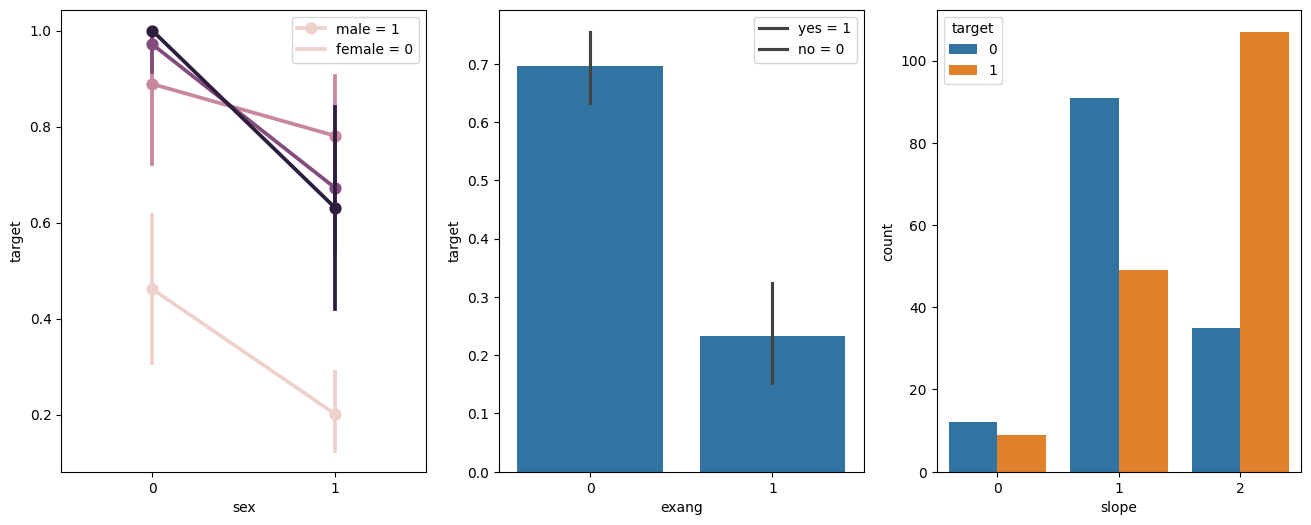

In [36]:
# create pairplot and two barplots
plt.figure(figsize=(16,6))
plt.subplot(131)
sns.pointplot(x="sex", y="target", hue='cp', data=heart)
plt.legend(['male = 1', 'female = 0'])
plt.subplot(132)
sns.barplot(x="exang", y="target", data=heart)
plt.legend(['yes = 1', 'no = 0'])
plt.subplot(133)
sns.countplot(x="slope", hue='target', data=heart)
plt.show()

# DATA PREPROCESSING

In [37]:
heart = pd.read_csv('heart.csv')

In [38]:
heart['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [39]:
heart['target'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Name: target, Length: 303, dtype: bool

In [40]:
heart['target'].sum()

165

In [41]:
heart['target'].unique()

array([1, 0], dtype=int64)

In [42]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Storing in X and y

In [43]:
X,y=heart,heart.target

In [44]:
X.drop('target',axis=1,inplace=True)

In [45]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [46]:
y


0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [47]:
X.shape

(303, 13)

In [48]:
y.shape

(303,)

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [50]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [51]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.3)

In [52]:
X

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

In [53]:
y_test

246    0
183    0
229    0
126    1
184    0
      ..
69     1
21     1
210    0
78     1
174    0
Name: target, Length: 91, dtype: int64

In [54]:
print ("train_set_x shape: " + str(X_train.shape))
print ("train_set_y shape: " + str(y_train.shape))
print ("test_set_x shape: " + str(X_test.shape))
print ("test_set_y shape: " + str(y_test.shape))

train_set_x shape: (212, 13)
train_set_y shape: (212,)
test_set_x shape: (91, 13)
test_set_y shape: (91,)


# Model selection

## Decision Tree Classifier

In [55]:
scores_dict = {}

In [56]:
Catagory=['No heart disease','Yes you have Heart Disease...']

In [57]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [58]:
prediction=dt.predict(X_test)
accuracy_dt=accuracy_score(y_test,prediction)*100

In [59]:
scores_dict['DecisionTreeClassifier'] = accuracy_dt
print(accuracy_dt)

74.72527472527473


In [60]:
print("Accuracy on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.747


In [61]:
y_test

246    0
183    0
229    0
126    1
184    0
      ..
69     1
21     1
210    0
78     1
174    0
Name: target, Length: 91, dtype: int64

In [62]:
print("Feature importances:\n{}".format(dt.feature_importances_))

Feature importances:
[0.10080309 0.03461456 0.34803953 0.08347568 0.0799599  0.
 0.         0.07473308 0.04724994 0.04836538 0.07300416 0.10975468
 0.        ]


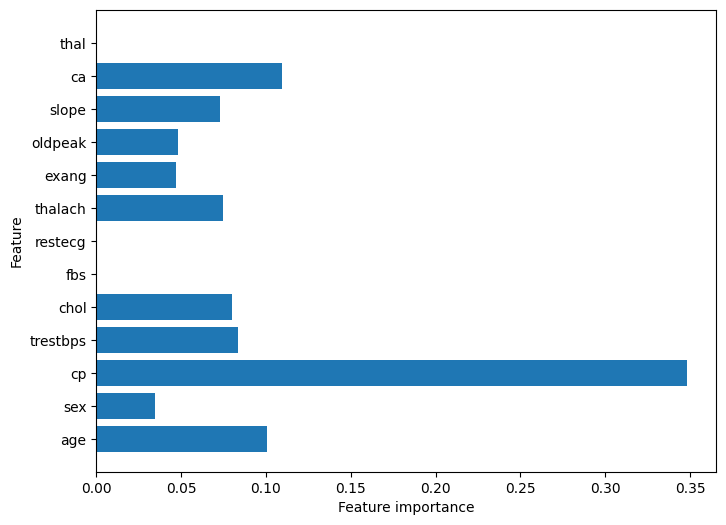

In [63]:
def plot_feature(model, feature_names=None):
    plt.figure(figsize=(8, 6))
    n_features = 13
    if feature_names is None:
        feature_names = [f"Feature {i}" for i in range(1, n_features + 1)]

    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

feature_name = np.array(heart.columns)
plot_feature(dt,feature_name)
plt.savefig('feature_importance')


In [64]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [65]:
#X_DT=np.array([[20 ,1, 2,120,143,0,1,120,0,2.0,1,0,1]]) # No disease
X_DT = np.array([[63,1,3,145,233,1,0,150,0,2.3,0,0,1]]) # yes disease
X_DT = sc.transform(X_DT)
X_DT_prediction=dt.predict(X_DT)
X_DT_prediction[0]

c:\Users\ujjwa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



1

In [66]:
print(Catagory[int(X_DT_prediction[0])])

Yes you have Heart Disease...


## KNN

In [67]:
from sklearn.neighbors import KNeighborsClassifier

In [68]:
k_range=range(1,26)
scores={}
h_score = 0       # to find the best score
best_k=0          # to find the best k
scores_list=[]  

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    prediction_knn=knn.predict(X_test)
    scores[k]=accuracy_score(y_test,prediction_knn)
    if scores[k]>h_score:
        h_score = scores[k]
        best_k = k

    scores_list.append(accuracy_score(y_test,prediction_knn))
print('The best value of k is {} with score : {}'.format(best_k,h_score))

The best value of k is 4 with score : 0.8571428571428571


In [69]:
knn=KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [70]:
prediction_knn=knn.predict(X_test)
accuracy_knn=accuracy_score(y_test,prediction_knn)*100
print('accuracy_score score     : ',accuracy_score(y_test,prediction_knn)*100,'%')
print('mean_squared_error score : ',mean_squared_error(y_test,prediction_knn)*100,'%')

accuracy_score score     :  85.71428571428571 %
mean_squared_error score :  14.285714285714285 %


In [71]:
scores_dict['KNeighborsClassifier'] = accuracy_knn
accuracy_knn

85.71428571428571

In [72]:
print("Accuracy on training set: {:.3f}".format(knn.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(knn.score(X_test, y_test)))

Accuracy on training set: 0.868
Accuracy on test set: 0.857


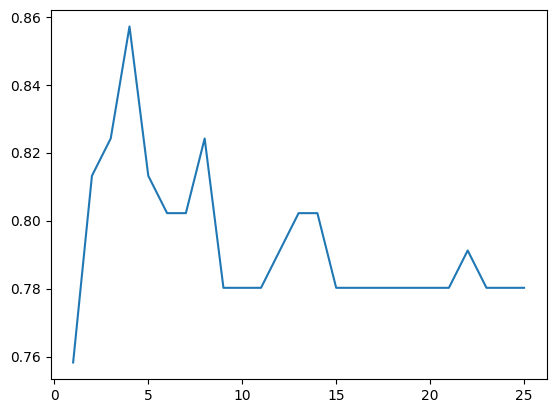

In [73]:
plt.plot(k_range,scores_list)

In [74]:
X_knn = np.array([[64,1,2,125,309,0,1,131,1,1.8,1,0,3]]) # No disease
#X_knn = np.array([[52,1,1,128,205,1,1,184,0,0,2,0,2]]) # yes disease
X_knn = sc.transform(X_knn)
X_knn_prediction = knn.predict(X_knn)
X_knn_prediction[0]

c:\Users\ujjwa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



0

In [75]:
print(Catagory[int(X_knn_prediction[0])])

No heart disease


## SVC

In [76]:
from sklearn.svm import SVC

svc = SVC(C=2.0,kernel='rbf',gamma='auto').fit(X_train,y_train)
Y_predict = svc.predict(X_test)
print('Accuracy score : {:.3f} %'.format(accuracy_score(y_test,Y_predict)*100))
scores_dict['SVC'] = accuracy_score(y_test,Y_predict)*100


Accuracy score : 81.319 %


In [77]:
X_svc = np.array([[64,1,2,125,309,0,1,131,1,1.8,1,0,3]]) # No disease
#X_svc = np.array([[52,1,1,128,205,1,1,184,0,0,2,0,2]]) # yes disease
X_svc = sc.transform(X_svc)
X_svc_prediction = svc.predict(X_svc)
X_svc_prediction[0]

c:\Users\ujjwa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



0

In [78]:

print(Catagory[int(X_svc_prediction[0])])

No heart disease


## Result Compariosion

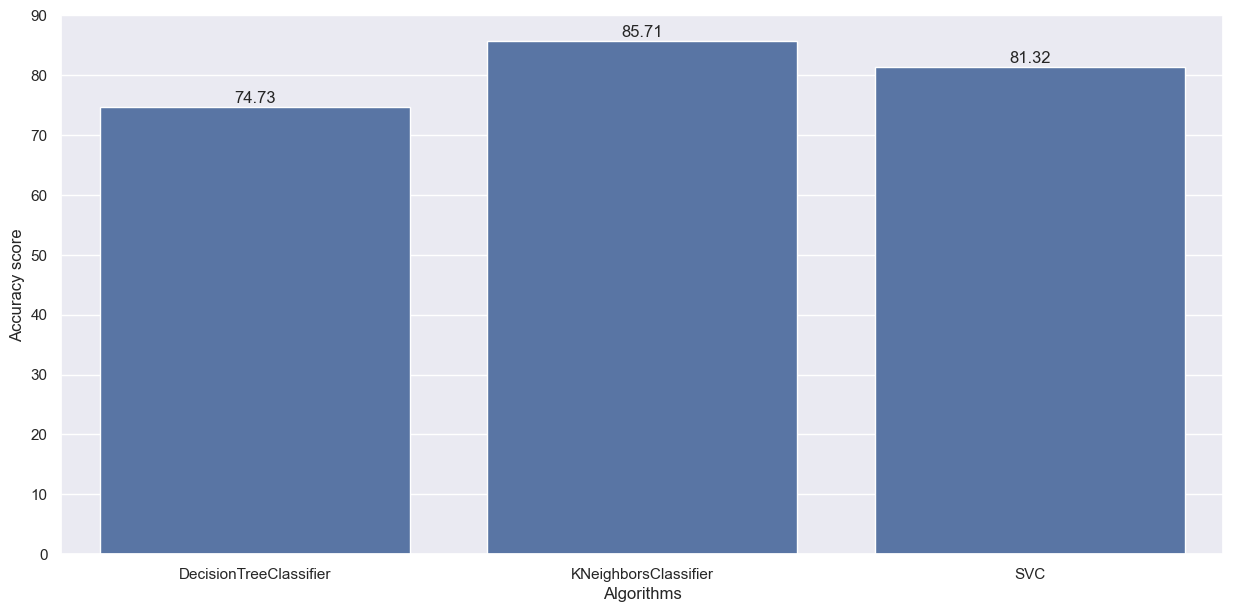

In [79]:

with sns.color_palette('muted'):
    algo_name = list(scores_dict.keys())
    scoress = list(scores_dict.values())
    sns.set(rc={'figure.figsize': (15, 7)})
    plt.xlabel("Algorithms")
    plt.ylabel("Accuracy score")
    bar_plot = sns.barplot(x=algo_name, y=scoress)
    for index, value in enumerate(scoress):
        bar_plot.text(index, value + 0.2, str(round(value, 2)), ha='center', va='bottom')
    plt.show()
